# CBOE Volatility Index (^VIX) 


**Source**

- [Yahoo finance ^VIX](https://finance.yahoo.com/quote/%5EVIX/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Extract-right-columns-and-sort" data-toc-modified-id="Extract-right-columns-and-sort-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract right columns and sort</a></span></li><li><span><a href="#Insert-Rata-Die-Column" data-toc-modified-id="Insert-Rata-Die-Column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Insert Rata Die Column</a></span><ul class="toc-item"><li><span><a href="#Insert-Future-Date" data-toc-modified-id="Insert-Future-Date-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Insert Future Date</a></span></li><li><span><a href="#Update-the-Rata-Die-Column" data-toc-modified-id="Update-the-Rata-Die-Column-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Update the Rata Die Column</a></span></li><li><span><a href="#Fill-in-Empty-Dates-and-Sort" data-toc-modified-id="Fill-in-Empty-Dates-and-Sort-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fill in Empty Dates and Sort</a></span></li><li><span><a href="#Fill:-Draw-Plots" data-toc-modified-id="Fill:-Draw-Plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fill: Draw Plots</a></span></li></ul></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quantize the values</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Averages</a></span><ul class="toc-item"><li><span><a href="#Averages:-Draw-Plots" data-toc-modified-id="Averages:-Draw-Plots-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Averages: Draw Plots</a></span></li><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save DataFrame to CSV file</a></span><ul class="toc-item"><li><span><a href="#Save:-Describe-before-saving" data-toc-modified-id="Save:-Describe-before-saving-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save: Describe before saving</a></span></li><li><span><a href="#Write-as-CSV-file" data-toc-modified-id="Write-as-CSV-file-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Write as CSV file</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dataset_file_name = "^VIX.csv"
path_data_original = "../Data/original/"
date_original_format = "yyyy-mm-dd"
column_to_keep = 3 # High

include("../Julia/functions.jl") 
println()

## Read Data

In [2]:
## show available datasets
#data = available_datasets() # uncomment to see all available datasets

# Read DataFrame from the CSV file.
df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )

#preview_data(df)
println()

Fetched ../Data/original/^VIX.csv, record count 7794



### Sample the data

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,1990-01-02,,2020-12-04,7794,,Date
2,Open,19.54,9.01,17.49,82.69,,,Float64
3,High,20.3149,9.31,18.06,89.53,,,Float64
4,Low,18.8155,8.56,16.86,72.76,,,Float64
5,Close,19.4663,9.14,17.44,82.69,,,Float64
6,Adj Close,19.4663,9.14,17.44,82.69,,,Float64
7,Volume,0.0,0,0.0,0,,,Int64


## Extract right columns and sort

In [4]:
using DataFrames
df = DataFrame( 
                  Date      = df[:,1]               # 2 
                , Original  = df[:,column_to_keep]  # 3 
                , Quantized = df[:,column_to_keep]  # 4 
               )

df = sort(df, [ :Date ]);

#columns = preview_data(df)
println()

## Insert Rata Die Column

In [5]:
## Insert the Rata Die Column
record_count = size(df)[1]
col_ind = 1
insertcols!(df, col_ind, :Rata_Die => zeros(Int64, record_count); makeunique = true )
println()

### Insert Future Date

In [6]:
using Dates
columns = names(df)
println(columns)

future_rata_die = Dates.datetime2rata( today() ) + 31 # days from now
future_date = Dates.rata2datetime( future_rata_die)
push!(df, [ future_rata_die future_date 0 0 ])

# sort by Day (Rata Die)
df = sort(df, [:Rata_Die]);

## show last row
#last_row = size(df)[1]
#df[last_row,:]

["Rata_Die", "Date", "Original", "Quantized"]


### Update the Rata Die Column

In [7]:
update_rata_die!(df, 1, 2)

#first(df, 6)
println("Inserted Rata Die")

Inserted Rata Die


### Fill in Empty Dates and Sort

In [8]:
populate_missing_dates!(df)

df = sort(df, [:Rata_Die]);

## remove last row
record_count = size(df)[1]
df = df[1:record_count-1,:]

println( preview_data(df) )
println()

Showing record IDs [1, 1889, 3777, 5665, 7553, 9441, 11326] at interval 1888
7×4 DataFrame
│ Row │ Rata_Die │ Date       │ Original │ Quantized │
│     │ Int64    │ Date       │ Float64  │ Float64   │
├─────┼──────────┼────────────┼──────────┼───────────┤
│ 1   │ 726469   │ 1990-01-02 │ 17.24    │ 17.24     │
│ 2   │ 728357   │ 1995-03-05 │ 11.91    │ 11.91     │
│ 3   │ 730245   │ 2000-05-05 │ 29.54    │ 29.54     │
│ 4   │ 732133   │ 2005-07-06 │ 12.33    │ 12.33     │
│ 5   │ 734021   │ 2010-09-06 │ 22.78    │ 22.78     │
│ 6   │ 735909   │ 2015-11-07 │ 16.0     │ 16.0      │
│ 7   │ 737794   │ 2021-01-04 │ 21.15    │ 21.15     │
 Dataset dimentions: (11326, 4)

 Column names (note any extra spaces):
1 'Rata_Die' 
2 'Date' 
3 'Original' 
4 'Quantized' 
["Rata_Die", "Date", "Original", "Quantized"]



### Fill: Draw Plots
- if the indicator is updated only preiodically (bi-weekly, monthly, quarterly) the the graph will appear blocky

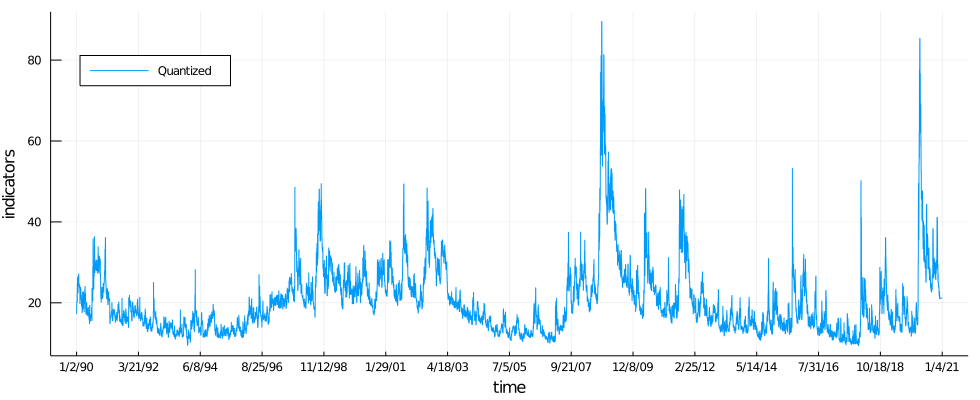

In [9]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [ df[rows,:Quantized]    ], # y-axis
    label    = [ "Quantized"  ""],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU
- minimum = -128.0
- maximum = 127.0

In [10]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df,4)

using Statistics
describe(df)

Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.32132e5,726469,7.32132e5,737794,,,Int64
2,Date,,1990-01-02,,2021-01-04,11326,,Date
3,Original,20.2536,9.31,18.025,89.53,,,Float64
4,Quantized,-93.2121,-128.0,-100.0,127.0,,,Float64


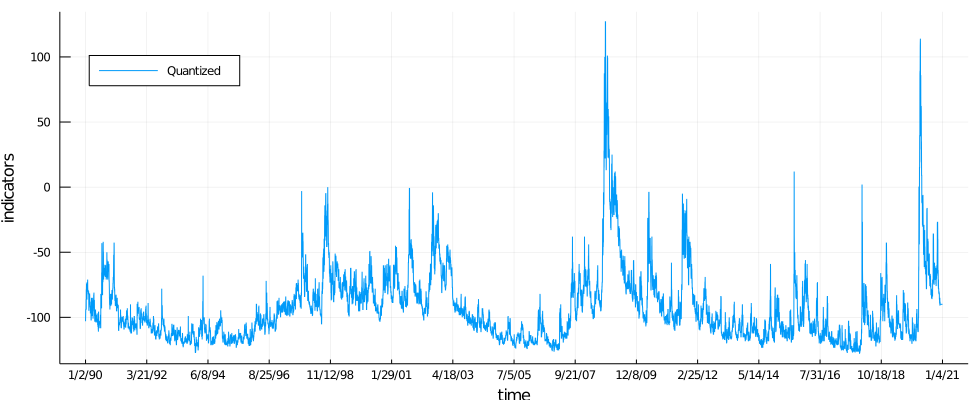

In [11]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,:Quantized]    ], # y-axis
    label    = [  "Quantized" ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Averages

In [12]:
averages005 = calculate_average(df, 5,   :Quantized )
averages030 = calculate_average(df, 30,  :Quantized )
averages060 = calculate_average(df, 60,  :Quantized )
averages090 = calculate_average(df, 90,  :Quantized )
averages120 = calculate_average(df, 120, :Quantized )
averages180 = calculate_average(df, 180, :Quantized )
averages365 = calculate_average(df, 365, :Quantized )
println()

### Averages: Draw Plots

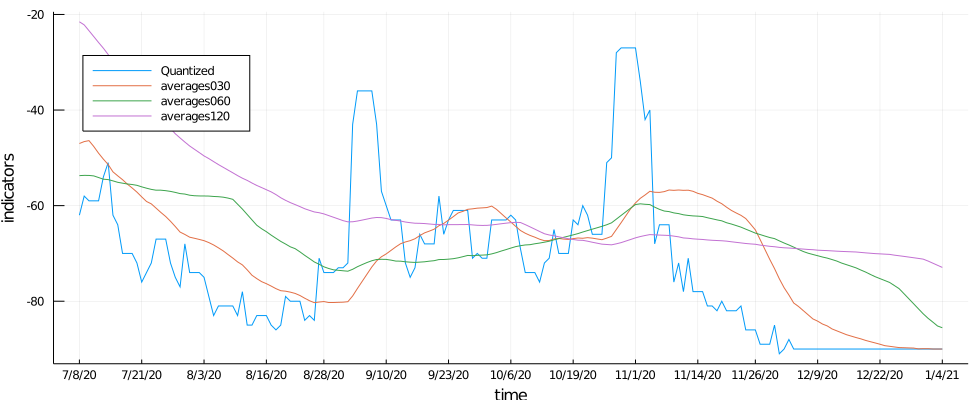

In [17]:
using Plots

columns = names(df)
record_count = size(df)[1]
days_back = 180
rows = record_count-days_back:record_count # count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [ df[rows,:Quantized] averages030[rows] averages060[rows] averages120[rows]  ], # y-axis
    label    = [ "Quantized" "averages030" "averages060" "averages120" ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Insert averages to DataFrame

- if the frequency of data is e.g. 30 days, averages below 30 days do not add value

In [14]:
insertcols!(df,  5,  :Avg030   => averages030  , makeunique=true)
insertcols!(df,  6,  :Avg060   => averages060  , makeunique=true)
insertcols!(df,  7,  :Avg090   => averages090  , makeunique=true)
insertcols!(df,  8,  :Avg120   => averages120  , makeunique=true)
insertcols!(df,  9,  :Avg180   => averages180  , makeunique=true)
insertcols!(df, 10,  :Avg365   => averages365  , makeunique=true)

using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.32132e5,726469,7.32132e5,737794,,,Int64
2,Date,,1990-01-02,,2021-01-04,11326,,Date
3,Original,20.2536,9.31,18.025,89.53,,,Float64
4,Quantized,-93.2121,-128.0,-100.0,127.0,,,Float64
5,Avg030,-92.9843,-125.13,-100.5,69.8,,,Float64
6,Avg060,-92.7609,-124.17,-100.775,63.62,,,Float64
7,Avg090,-92.5508,-123.27,-100.205,43.81,,,Float64
8,Avg120,-92.3417,-123.59,-99.48,30.68,,,Float64
9,Avg180,-91.9129,-122.07,-99.22,17.55,,,Float64


[back to top](#Table-of-Contents)
<hr/>

## Save DataFrame to CSV file

### Save: Describe before saving

In [15]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.32132e5,726469,7.32132e5,737794,,,Int64
2,Date,,1990-01-02,,2021-01-04,11326,,Date
3,Original,20.2536,9.31,18.025,89.53,,,Float64
4,Quantized,-93.2121,-128.0,-100.0,127.0,,,Float64
5,Avg030,-92.9843,-125.13,-100.5,69.8,,,Float64
6,Avg060,-92.7609,-124.17,-100.775,63.62,,,Float64
7,Avg090,-92.5508,-123.27,-100.205,43.81,,,Float64
8,Avg120,-92.3417,-123.59,-99.48,30.68,,,Float64
9,Avg180,-91.9129,-122.07,-99.22,17.55,,,Float64


### Write as CSV file

In [16]:
save_dataset(df, dataset_file_name, "../Data/processed/" );
println("Finished and saved to ", dataset_file_name)

Finished and saved to ^VIX.csv
